In [50]:
import pandas as pd
import data_cleaning as dc
import matplotlib.pyplot as plt
import seaborn as sns
import visualizations as viz

# dirty_data = pd.read_csv('./data/dirty_data.csv')
clean = dc.full_clean()
clean.head()

,company,location,role,salary,startdate,status,submitdate,year,region,industry
0,THE MATLEN SILVER GROUP INC,"CHARLOTTE, NC",DATA SCIENTIST,170000,01/05/2015,CERTIFIED,12/12/2014,2014,OTHER,OTHER
1,THOUGHTWORKS INC,"CHICAGO, IL",DATA SCIENTIST,71718,09/29/2014,CERTIFIED,09/29/2014,2014,OTHER,OTHER
2,EVANTAGE SOLUTIONS INC,"BELLEVUE, WA",DATA SCIENTIST,73923,12/15/2014,CERTIFIED,12/15/2014,2014,OTHER,OTHER
3,HOTWIRE INC,"BELLEVUE, WA",DATA SCIENTIST,74755,10/20/2014,CERTIFIED,10/08/2014,2014,OTHER,TECH
4,FINO CONSULTING LLC,"NEW YORK, NY",DATA SCIENTIST,82000,10/20/2014,CERTIFIED,10/16/2014,2014,NYC,CONSULTING


In [51]:
# Sample Constraints
years = list(range(2014,2020))
years = [str(y) for y in years]
years

['2014', '2015', '2016', '2017', '2018', '2019']

<b> Let's plot </b>

In [8]:
count_year_role = pd.pivot_table(h1b1,values='status',columns = 'role',index = 'year',aggfunc = 'count')
count_year_role

role,ASSOCIATE DATA SCIENTIST,DATA SCIENTIST,DATA SCIENTIST ANALYST,DATA SCIENTIST ENGINEER,DATA SCIENTIST I,DATA SCIENTIST II,LEAD DATA SCIENTIST,"SENIOR ASSOCIATE, DATA SCIENTIST",SENIOR DATA SCIENTIST
year,,,,,,,,,
2014,NaN,67.0,NaN,NaN,NaN,NaN,2.0,NaN,13.0
2015,13.0,515.0,4.0,5.0,3.0,7.0,8.0,NaN,103.0
2016,29.0,831.0,12.0,13.0,15.0,21.0,18.0,12.0,150.0
2017,38.0,1172.0,46.0,19.0,18.0,29.0,31.0,5.0,223.0
2018,60.0,1900.0,32.0,43.0,50.0,61.0,46.0,32.0,397.0
2019,80.0,1522.0,16.0,48.0,80.0,198.0,141.0,13.0,409.0


In [38]:
# [x for x in count_year_role.index()]#.values.tolist()
area_data = [count_year_role.loc[x,:].tolist() for x in count_year_role.index ]

In [39]:
# area_data = [[0,67,0,0,0,0,2,0,13] ,
#              [13,514,4,5,3,7,8,0,103] , 
#              [29,830,12,13,15,21,18,12,150], 
#              [38,1171,46,19,18,29,31,5,223], 
#              [60,1898,32,43,50,61,46,32,397], 
#              [80,1522,16,48,80,198,141,13,409] ]
area_data_T = list(map(list, zip(*area_data)))
area_data_T

[[nan, 13.0, 29.0, 38.0, 60.0, 80.0],
 [67.0, 515.0, 831.0, 1172.0, 1900.0, 1522.0],
 [nan, 4.0, 12.0, 46.0, 32.0, 16.0],
 [nan, 5.0, 13.0, 19.0, 43.0, 48.0],
 [nan, 3.0, 15.0, 18.0, 50.0, 80.0],
 [nan, 7.0, 21.0, 29.0, 61.0, 198.0],
 [2.0, 8.0, 18.0, 31.0, 46.0, 141.0],
 [nan, nan, 12.0, 5.0, 32.0, 13.0],
 [13.0, 103.0, 150.0, 223.0, 397.0, 409.0]]

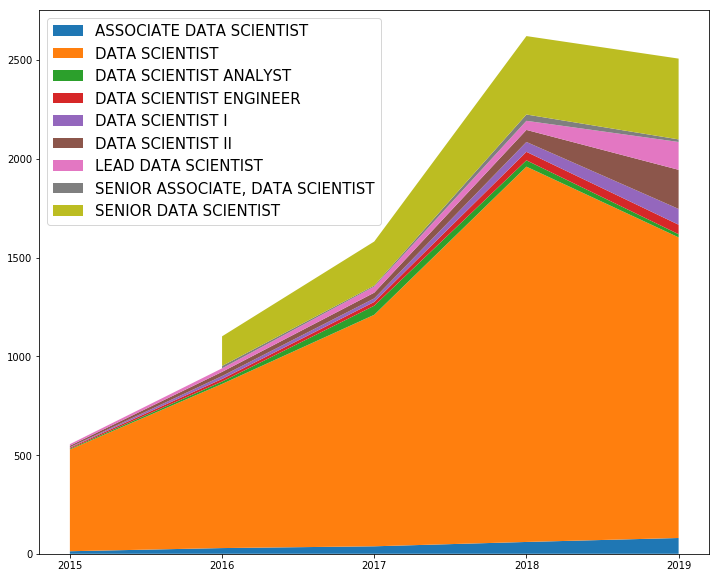

In [41]:
fig = plt.figure(figsize = (12,10))
ax = plt.stackplot(years,area_data_T, labels = ['ASSOCIATE DATA SCIENTIST','DATA SCIENTIST','DATA SCIENTIST ANALYST',
                                              'DATA SCIENTIST ENGINEER', 'DATA SCIENTIST I','DATA SCIENTIST II',
                                              'LEAD DATA SCIENTIST','SENIOR ASSOCIATE, DATA SCIENTIST' ,
                                              'SENIOR DATA SCIENTIST'])
plt.legend(fontsize = 15, loc='upper left')
plt.show()
fig.savefig("./img/h1b1_applications_byrole_stacked_area.png")

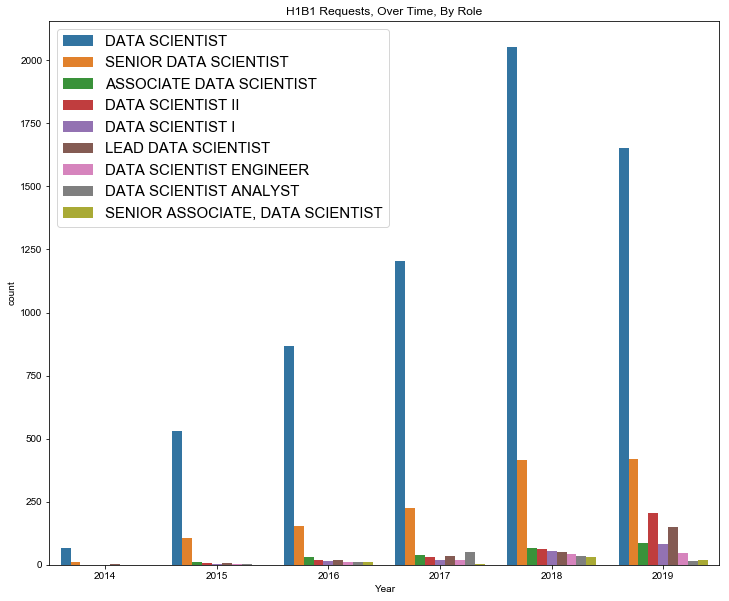

In [40]:
fig = plt.figure(figsize = (12,10))

ax = sns.countplot(x = 'Year', data = h1b1, hue = 'Role')
# ax = plt.stackplot(years[1:],area_data, labels = save_titles)
plt.title('H1B1 Requests, Over Time, By Role')
plt.legend(fontsize = 15, loc='upper left')

sns.set_context('poster')
sns.set_style("darkgrid")

fig.savefig("./images/h1b1_applications_byrole_bar.png")
plt.show()

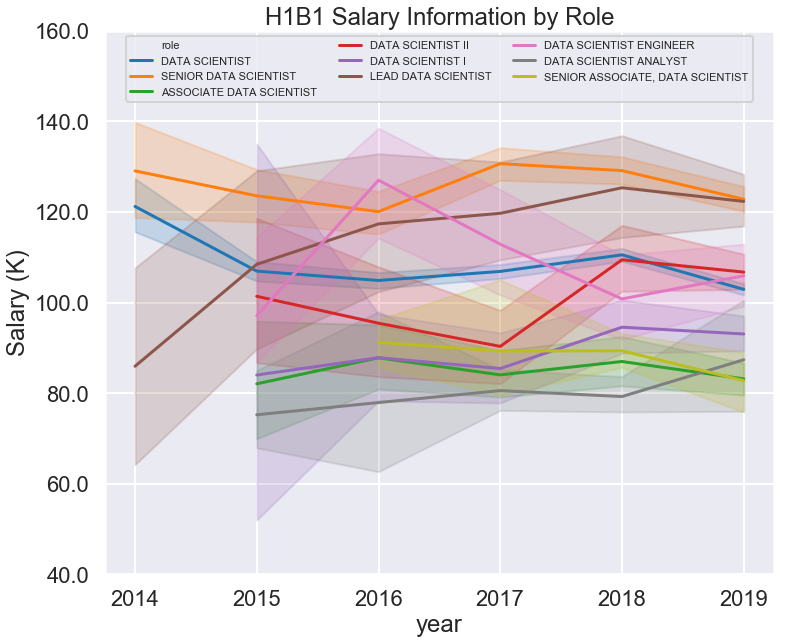

In [43]:
fig = plt.figure(figsize = (12,10))
ax = sns.lineplot(x="year", y="salary", data=h1b1, hue = 'role')

locs,labels = plt.yticks()
ticks = ax.get_yticks()
plt.ylabel('Salary (K)')
plt.yticks(locs, ticks/1000)
plt.title('H1B1 Salary Information by Role')

plt.legend(ncol = 3, fontsize = 11, loc='upper center')

sns.set_context('poster')
sns.set_style("darkgrid")

fig.savefig("img/h1b1_salaries_byrole.png")
plt.show()

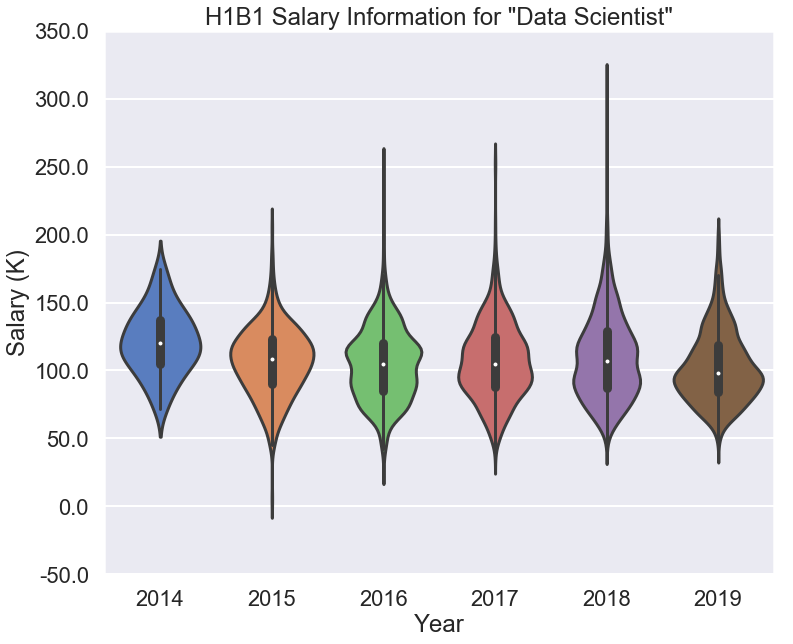

In [42]:
fig = plt.figure(figsize = (12,10))
ax = sns.violinplot(x="Year", y="Salary", data=h1b1[h1b1['Role']=='DATA SCIENTIST'], palette="muted")
locs,labels = plt.yticks()
ticks = ax.get_yticks()
plt.ylabel('Salary (K)')
plt.yticks(locs, ticks/1000)
sns.set_context('poster')
sns.set_style("darkgrid")
plt.title('H1B1 Salary Information for "Data Scientist"')
# fig.savefig("images/h1b1_violin.png")
plt.show()

In [ ]:
# Break out by industry and location

In [45]:
h1b1.columns

Index(['Company', 'Location', 'Role', 'Salary', 'StartDate', 'Status',
       'SubmitDate', 'Year', 'Region'],
      dtype='object')

In [21]:
x = h1b1.loc[h1b1.Location.map(lambda x: ', DC' in x)].Location.unique().tolist()
x.extend(['VA'])
x.extend(['MD'])
x

['WASHINGTON, DC', 'WASHINGTON, DC, DC', 'WASHINGTON DC, DC', 'VA', 'MD']

In [63]:
# Create Regional Tags

# Example
h1b1.loc[h1b1.Location.map(lambda x: ', CA' in x)].Location.unique()
h1b1.loc[h1b1.Location.map(lambda x: ', NY' in x)].Location.unique()


bay_area = ['ALAMEDA, CA', 'BELMONT, CA', 'BENICIA, CA', 'BERKELEY, CA', 'BRISBANE, CA', 'BURLINGAME, CA', 'CAMPBELL, CA',
       'CUPERTINO, CA', 'DUBLIN, CA', 'EAST PALO ALTO, CA','EL CERRITO, CA', 'EMERYVILLE, CA', 'FOLSOM, CA',
       'FOSTER CITY, CA', 'FREMONT, CA',  'HERCULES, CA', 'LOS ALTOS, CA', 'LOS GATOS, CA', 'MENLO PARK, CA',
       'MILL VALLEY, CA', 'MILLBRAE, CA', 'MILPITAS, CA', 'MOUNTAIN VIEW, CA', 'NEWARK, CA', 'NOVATO, CA',
       'OAKLAND, CA', 'PALO  ALTO, CA', 'PALO ALTO, CA', 'PASADENA, CA', 'PETALUMA, CA', 'PLEASANT HILL, CA', 'PLEASANTON, CA',
       'REDLANDS, CA', 'REDWOOD CITY, CA', 'REDWOOD SHORES, CA', 'RICHMOND, CA', 'SAN BRUNO, CA', 'SAN CARLOS, CA',
       'SAN FANCISCO, CA', 'SAN FRANCICSCO, CA', 'SAN FRANCISCO, CA', 'SAN FRANCISCO, CA, CA', 'SAN JOSE, CA',  'SAN MATEO, CA',
       'SAN RAMON, CA', 'SANJOSE, CA', 'SAUSALITO, CA', 'SOUTH SAN FRANCISCO, CA', 'SUNNYVALE, CA', 'TIBURON, CA', 'UNION CITY, CA',
       'VALLEJO, CA', 'VENICE, CA', 'WALNUT CREEK, CA','SAN FRANCISCO, VA']



# bay_area = ['MOUNTAIN VIEW, CA', 'FREMONT, CA', 'SAN JOSE, CA', 'SAN FRANCISCO, CA', 'SAN MATEO, CA', 'MILPITAS, CA', 'PALO ALTO, CA', 'FOSTER CITY, CA', 'HOLLYWOOD, CA',
#         'MENLO PARK, CA', 'SANTA CLARA, CA', 'SAN CARLOS, CA', 'REDWOOD CITY, CA', 'CAMPBELL, CA', 'SUNNYVALE, CA', 'MILL VALLEY, CA',  'SAN FRANCISCO, CA, CA', 'EMERYVILLE, CA',
#         'CUPERTINO, CA', 'LOS ALTOS, CA', 'SAN BRUNO, CA', 'BURLINGAME, CA', 'BERKELEY, CA', 'NEWARK, CA', 'SAN FRANCICSCO, CA', 'PALO  ALTO, CA', 'OAKLAND, CA', 
#         'MILLBRAE, CA', 'DUBLIN, CA', 'SAUSALITO, CA', 'REDWOOD SHORES, CA', 'BRISBANE, CA', 'WALNUT CREEK, CA','NOVATO, CA', 'EAST PALO ALTO, CA', 'SANJOSE, CA','EL CERRITO, CA', 
#         'VALLEJO, CA', 'UNION CITY, CA', 'TIBURON, CA', 'LAFAYETTE, CA', 'SOUTH SAN FRANCISCO, CA', 'MODESTO, CA', 'RICHMOND, CA', 'BELMONT, CA', 'PLEASANT HILL, CA', 'SAN FANCISCO, CA',
#         'ALAMEDA, CA', 'TUSTIN, CA', 'PETALUMA, CA', 'REDLANDS, CA', 'AUSTIN, CA','LOS GATOS, CA','SAN FRANCISCO, VA']

nyc = ['NEW YORK, NY',  'BROOKLYN, NY', 'NEW  YORK, NY', 'NEW YORK CITY, NY', 'IRVINGTON, NY', 'LONG ISLAND CITY, NY', 'NYC, NY']
longisland = ['EAST MEADOW, NY','FARMINGDALE, NY', 'PORT WASHINGTON, NY','LONG BEACH, NY', 'MELVILLE, NY','LYNBROOK, NY','JERICHO, NY', 'UNIONDALE, NY']
westchester= ['ARMONK, NY','WHITE PLAINS, NY',  'YONKERS, NY','TARRYTOWN, NY','SPRING VALLEY, NY', 'SOMERS, NY','SOMMERS, NY','VALHALLA, NY','SOMERS, NY', 'YORKTOWN HEIGHTS, NY','YORKTOWN HIEGHTS, NY','WOODBURY, NY']

dmv = ['WASHINGTON, DC', 'WASHINGTON, DC, DC', 'WASHINGTON DC, DC','MCLEAN, VA','RETSON, VA', 'STERLING, VA', 'ALEXANDRIA, VA', 'ARLINGTON, VA', 'HERNDON, VA', 'ASHBURN, VA', 'MANASSAS, VA', 'RESTON, VA', 
    'FALLS CHURCH, VA','FAIRFAX, VA', 'DULLES, VA','BETHESDA, MD', 'SILVER SPRING, MD','COLUMBIA, MD','ROCKVILLE, MD']

# Add a columns for the split
h1b1['Region'] = ['BAYAREA'  if x in bay_area else 'NYC' if x in nyc else 'DC' if x in dmv else 'OTHER' for x in h1b1.Location]
    

In [68]:
h1b1[h1b1['Region']=='DC'].Location.unique()

array(['WASHINGTON, DC', 'MCLEAN, VA', 'DULLES, VA', 'BETHESDA, MD',
       'HERNDON, VA', 'ALEXANDRIA, VA', 'COLUMBIA, MD', 'ASHBURN, VA',
       'WASHINGTON, DC, DC', 'ARLINGTON, VA', 'FAIRFAX, VA',
       'ROCKVILLE, MD', 'FALLS CHURCH, VA', 'WASHINGTON DC, DC',
       'RETSON, VA', 'SILVER SPRING, MD', 'STERLING, VA', 'MANASSAS, VA',
       'RESTON, VA'], dtype=object)

In [27]:
h1b1_DS = h1b1[h1b1['Role']=='DATA SCIENTIST']
h1b1_DS.shape

(6002, 11)

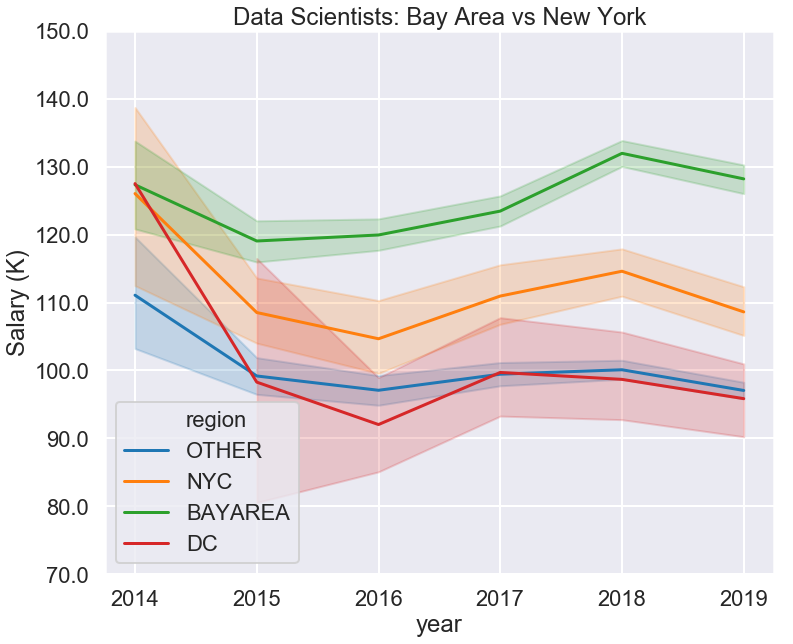

In [49]:
# Bay Area versus NY
fig = plt.figure(figsize = (12,10))
ax = sns.lineplot(x="year", y="salary",data=h1b1, hue='region')
locs,labels = plt.yticks()
ticks = ax.get_yticks()
plt.ylabel('Salary (K)')
plt.yticks(locs, ticks/1000)
sns.set_context('poster')
sns.set_style("darkgrid")

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[1:],['Bay Area','NY'])

# n_data = len(h1b1[h1b1['Role']=='DATA SCIENTIST'])

plt.title(f'Data Scientists: Bay Area vs New York')
fig.savefig("img/timeseries_region.png")
plt.show()

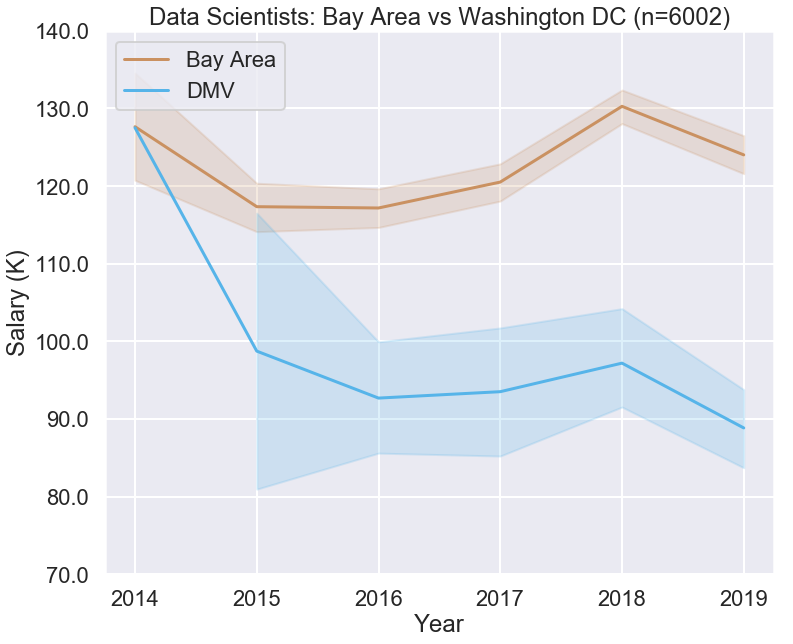

In [29]:
fig = plt.figure(figsize = (12,10))

ax = sns.lineplot(x="Year", y="Salary", data=h1b1[h1b1['Role']=='DATA SCIENTIST'], palette={0.0: sns.color_palette('colorblind')[5], 2.0: sns.color_palette('colorblind')[9]}, hue='SV0_DMV2')
locs,labels = plt.yticks()
ticks = ax.get_yticks()
plt.ylabel('Salary (K)')
plt.yticks(locs, ticks/1000)
sns.set_context('poster')
sns.set_style("darkgrid")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:],['Bay Area','DMV'])

n_data = len(h1b1[h1b1['Role']=='DATA SCIENTIST'])

plt.title(f'Data Scientists: Bay Area vs Washington DC (n={n_data})')
fig.savefig("images/h1b1_DSgen_DMV_SV.png")
plt.show()

In [75]:
fig = plt.figure(figsize = (12,10))
ax = sns.lineplot(x="Year", y="Salary", data=h1b1[h1b1['Role']=='DATA SCIENTIST'], palette={1.0: sns.color_palette('colorblind')[7], 2.0: sns.color_palette('colorblind')[9]}, hue='NYC1_DMV2')
locs,labels = plt.yticks()
ticks = ax.get_yticks()
plt.ylabel('Salary (K)')
plt.yticks(locs, ticks/1000)
sns.set_context('poster')
sns.set_style("darkgrid")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:],['NYC','DMV'])


n_data = len(h1b1[h1b1['Role']=='DATA SCIENTIST'])

plt.title(f'Data Scientists: NYC vs Washington DC (n={n_data})')
fig.savefig("images/h1b1_DSgen_NYC_DMV.png")
plt.show()

ValueError: Could not interpret input 'NYC1_DMV2'

<Figure size 864x720 with 0 Axes>